# Data Analysis of police arrest data

## Introduction

- This is a data analysis from the source [Pittsburgh Police Arrest Data](https://data.wprdc.org/dataset/arrest-data)
- The csv file shows the time, location of each crime happened in Pittsburgh from 1998-2024 (It's desctiption says 1998-2023, but the data set actually contains 2024...)
- Advantage of the data set:
  - very up-to-date
  - Clearly labeled each crime's neighborhood
- How it relate to "The Best Neighborhood in Pittburgh"?
  - Generally, neighborhood with less crimes win
  - We can also analysis it by its trend

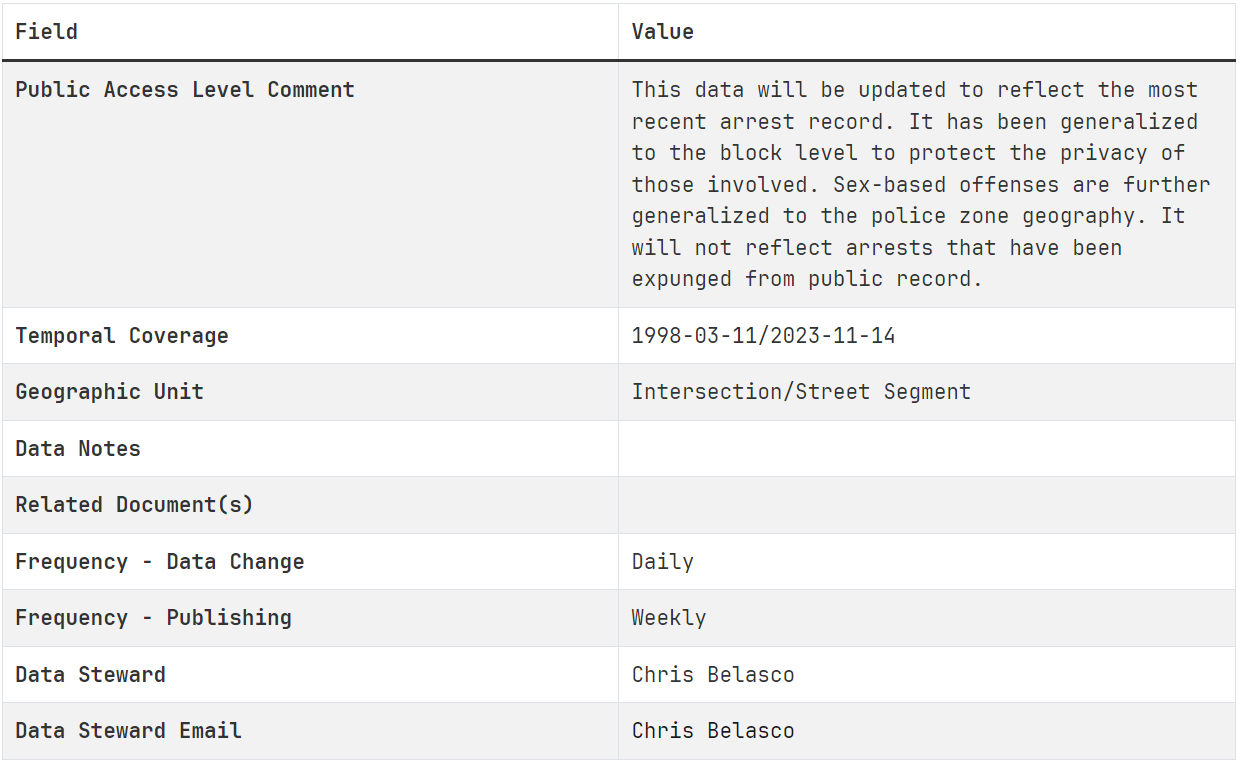

## Number of Crimes By Community from 2016-2025 

- The following code generate a bar chart to represent the total number of crime from 2016-2015 by community.
- Crimes in different years were labled as different colors.

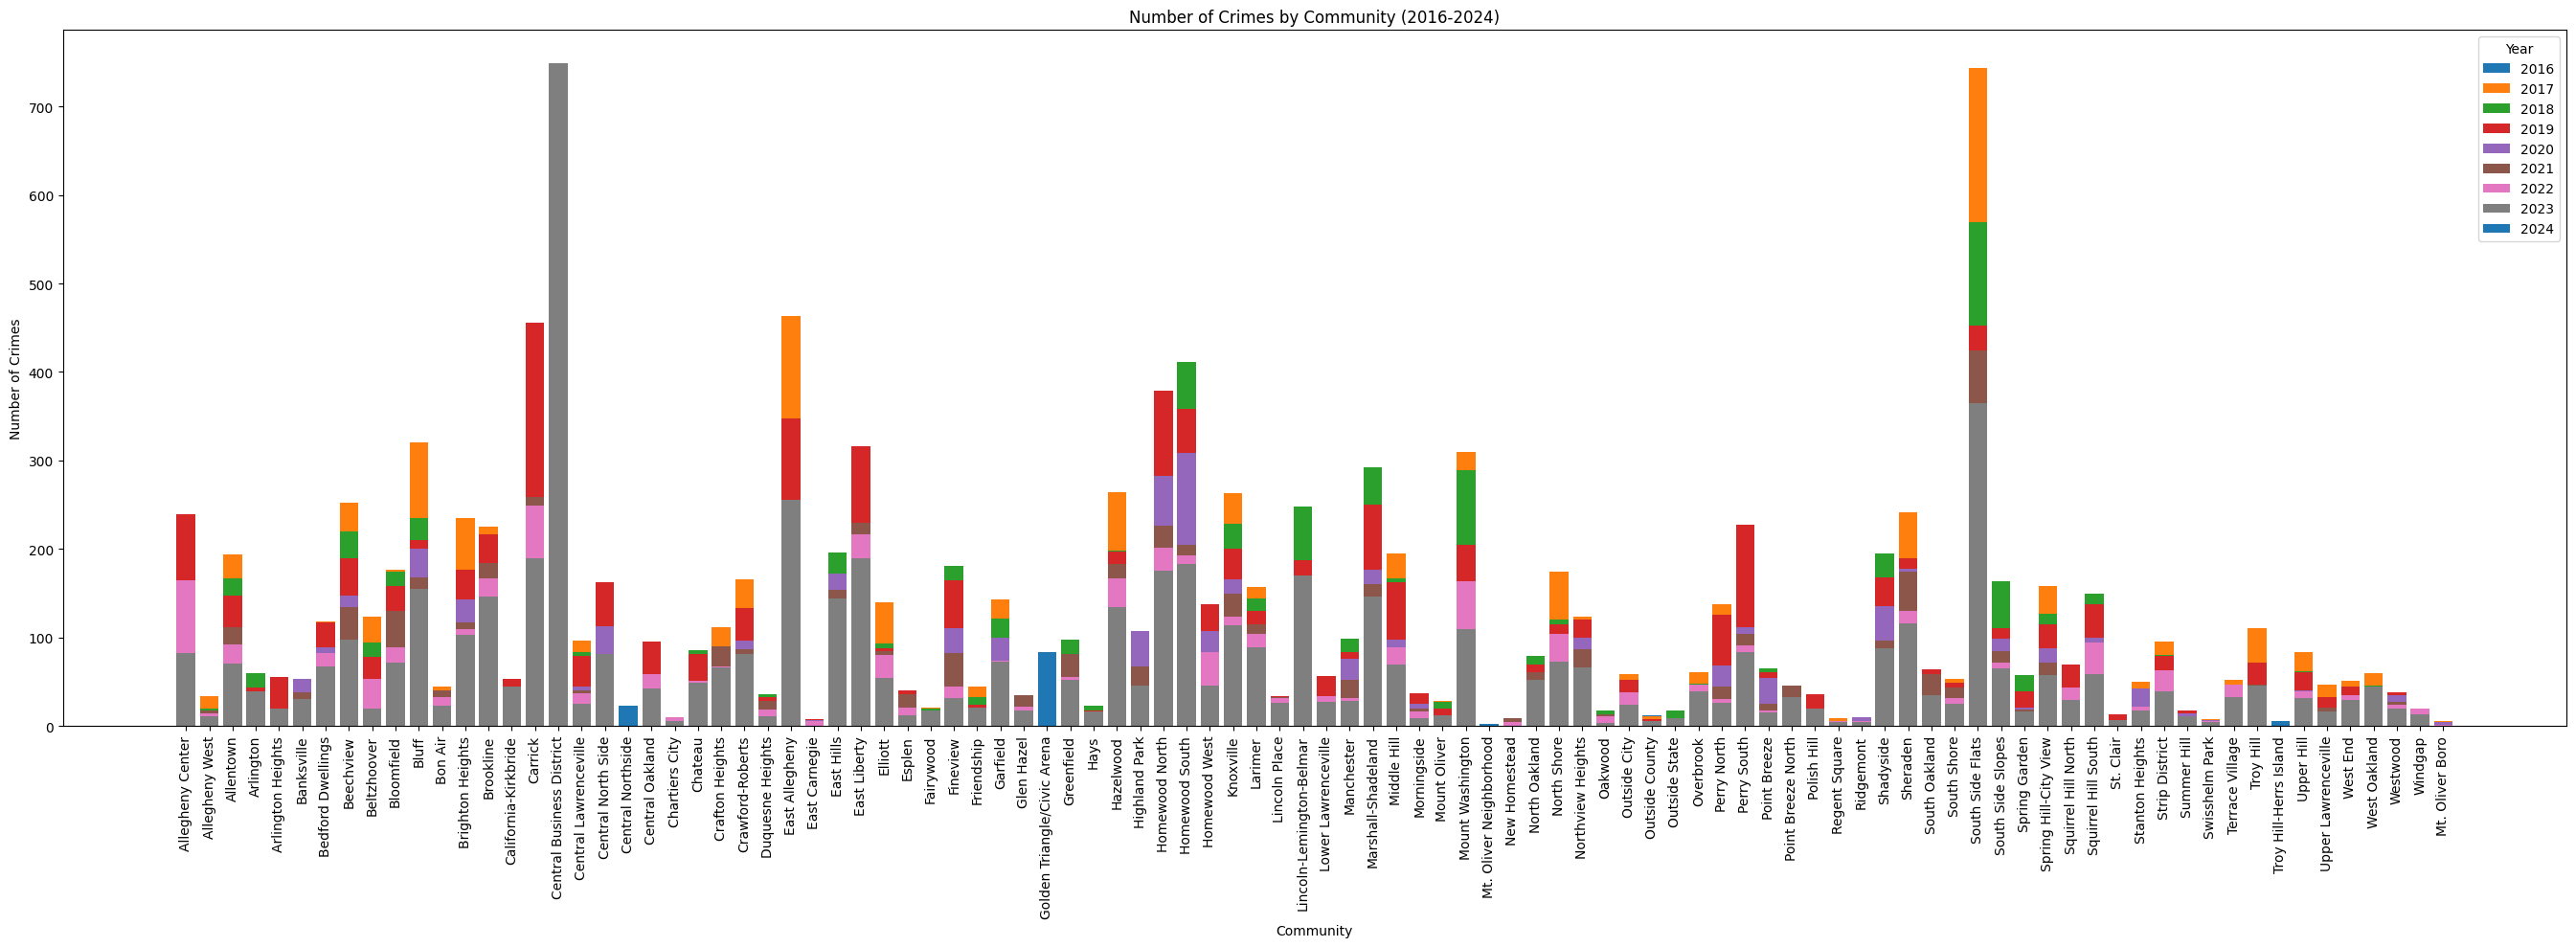

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# read file
data = pd.read_csv("Pittsburgh Police Arrest Data.csv")

# transfer ARRESTTIME to datetime
data['ARRESTTIME'] = pd.to_datetime(data['ARRESTTIME'])

# get year and neighborhood
data['Year'] = data['ARRESTTIME'].dt.year
data['Community'] = data['INCIDENTNEIGHBORHOOD']

# count by year and neighborhood
crime_count = data.groupby(['Year', 'Community']).size().reset_index(name='Count')

# create a list contains every year
years = list(range(2016, 2025))

# create matplotlib canvas
plt.figure(figsize=(27, 10))

# iterate each year
for year in years:
    # get corresponing data of the year
    year_data = crime_count[crime_count['Year'] == year]
    # draw bar chart
    plt.bar(year_data['Community'], year_data['Count'], label=str(year))

# add title and label
plt.title('Number of Crimes by Community (2016-2024)')
plt.xlabel('Community')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.legend(title='Year')
plt.tight_layout()

# show
plt.show()


## Top 10 neighborhood with fewest crime arrested data in total

In [5]:
# count every neighborhood's crime
crime_counts = data['INCIDENTNEIGHBORHOOD'].value_counts()

# top 10 least crime neighborhood
top_10_least_crime = crime_counts.nsmallest(10)

# print the result
print("Top 10 neighborhoods with the least crime:")
print(top_10_least_crime)

Top 5 neighborhoods with the least crime:
Mt. Oliver Neighborhood     2
Troy Hill-Herrs Island      6
Mt. Oliver Boro            18
Central Northside          23
Regent Square              37
Ridgemont                  37
New Homestead              39
Swisshelm Park             43
Chartiers City             46
East Carnegie              48
Name: INCIDENTNEIGHBORHOOD, dtype: int64


## Line Chart of the trend of crime arrest change with less than 50 in total

- Q&A:
  - Why only keep the year data >= 2016
    - <2016 is too early...
    - The number of crimes before 2016 is too less, it will break the readability of graph if we keep them
  - Why we only keep the total crime counts <= 50
    - The limit size of canvas can't make sure a large range of data represent with no overlap...
    - Also, we only need to find the "best" neighborhood with almost least number of crime arrest
  - What's the meaning of using the line chart?
    - We can see the situation of the neighborhood is changing or not.
    - It can avoid the bias if there is a neighborhood has the least total number of crime arrest, but they all happened in 2024... That's the worst trend... 

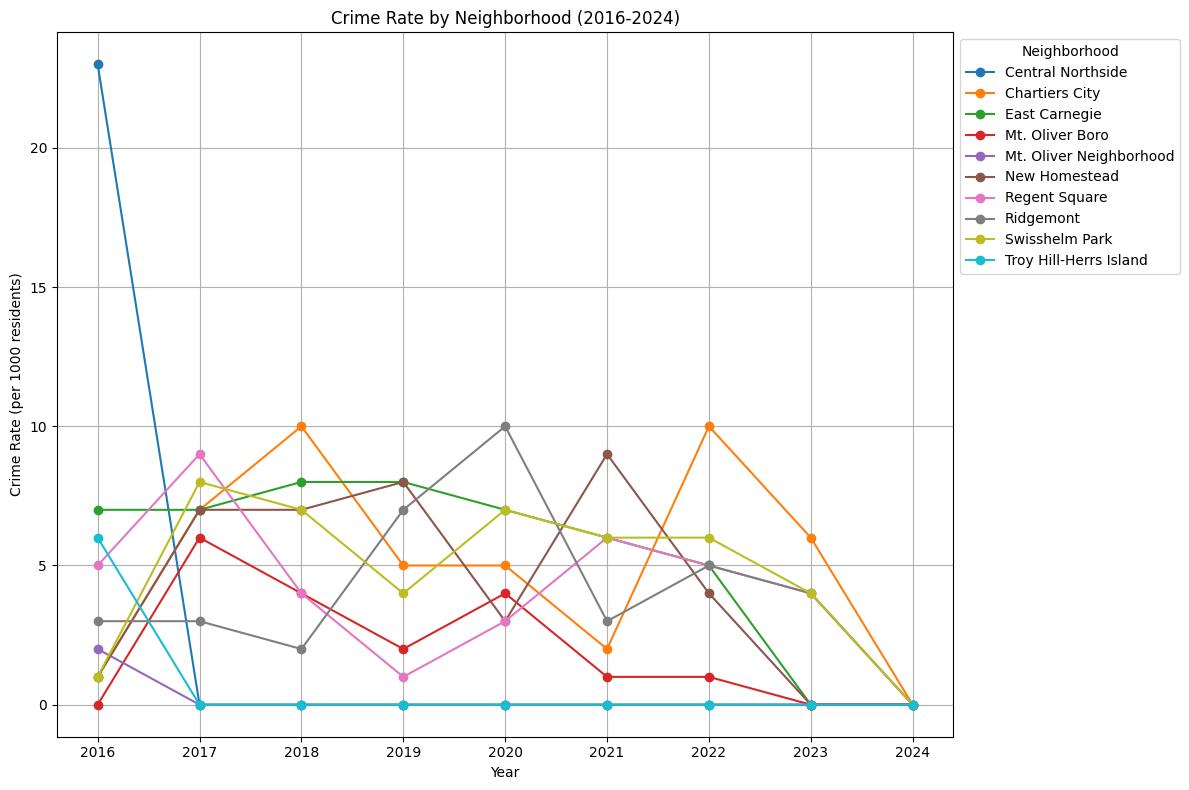

In [9]:
# read data
crime_data = pd.read_csv('Pittsburgh Police Arrest Data.csv')

# Transfer the type of ARRESTTIME to datetime
crime_data['ARRESTTIME'] = pd.to_datetime(crime_data['ARRESTTIME'])


# filter the year data >=2016
crime_data = crime_data[crime_data['ARRESTTIME'].dt.year >= 2016]


# Calculate every neighborhood's total crime number
crime_counts = crime_data['INCIDENTNEIGHBORHOOD'].value_counts()


# Filter crime data and only keep the neighborhood with <50 crime data in total
crime_counts = crime_counts[crime_counts <= 50]
crime_data = crime_data[crime_data['INCIDENTNEIGHBORHOOD'].isin(crime_counts.index)]


# Get year
crime_data['Year'] = crime_data['ARRESTTIME'].dt.year

# calculate crime data of each neighborhood per year
crime_counts = crime_data.groupby(['Year', 'INCIDENTNEIGHBORHOOD']).size().unstack(fill_value=0)

# Use reindex to add the missing year. (0)
years_range = range(2016, 2025)
crime_counts = crime_counts.reindex(years_range, axis=0).fillna(0)

# Calculate the crime rate for each neighborhood annually (per thousand residents).
# Assuming you have population data, you can use it as the denominator to calculate the crime rate for each neighborhood.
# Here, it is assumed that the population of each neighborhood is 1000. You need to replace it with actual population data.

population_per_neighborhood = 1000
crime_rates = (crime_counts / population_per_neighborhood) * 1000

# draw the line chart
crime_rates.plot(kind='line', marker='o', figsize=(12, 8))

# add title and label
plt.title('Crime Rate by Neighborhood (2016-2024)')
plt.xlabel('Year')
plt.ylabel('Crime Rate (per 1000 residents)')

# add legend
plt.legend(title='Neighborhood', loc='upper left', bbox_to_anchor=(1, 1))

# set grid
plt.grid(True)

# set x to years.
plt.xticks(crime_rates.index)

# format the graph, in order to avoid the overlap of labels. 
plt.tight_layout()

# show plot
plt.show()




Although Troy Hill-Herrs Island, Central Northside, and Mt. Oliver Neighborhood do not have the lowest total crime counts, considering that these three neighborhoods have had no arrest records since 2017, they appear to be the safest based on the trend.

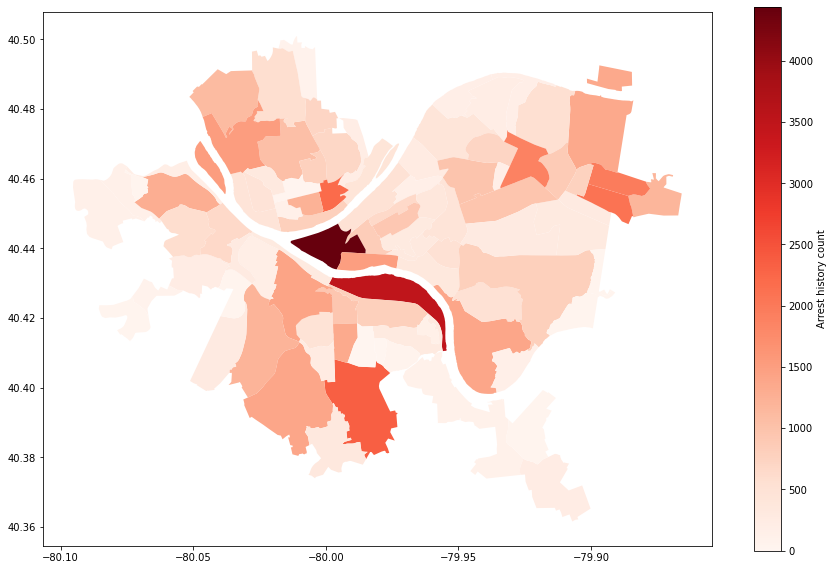

In [10]:
# read data
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


crime_data = pd.read_csv('Pittsburgh Police Arrest Data.csv')
city_pitts_gdf = gpd.read_file("City_of_Pittsburgh_Neighborhoods.shp")

# crime_counts = crime_data['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
crime_counts = crime_data['INCIDENTNEIGHBORHOOD'].value_counts()

city_pitts_gdf['crime_count'] = city_pitts_gdf['HOOD'].map(crime_counts).fillna(0)

city_pitts_gdf.plot(column = 'crime_count', legend = True, cmap = "Reds", figsize=(15, 10), legend_kwds={"label": "Arrest history count"})

# city_pitts_gdf.plot(column = 'tree_count', legend = True, cmap = "Greens", figsize=(15, 10), legend_kwds={"label": "Density of Trees"})


- [shape file download](https://spcgis-spc.hub.arcgis.com/datasets/SPC::city-of-pittsburgh-neighborhoods/explore?location=40.432071%2C-79.980596%2C11.99)
- This heatmap is not the best to decide which neighborhood is best to live, but definitely would able to tell us which neighborhood is comparatively dangerous...

## Conclusion

I believe trends are more important than the total number of crimes, so __Troy Hill-Herrs Island, Central Northside, and Mt. Oliver__ Neighborhood are the top three neighborhoods most suitable for living in this dataset. Of course, there are also many neighborhoods with low crime rates and high rankings, which can be integrated when conclusions are drawn from other datasets.
